<a href="https://colab.research.google.com/github/ReneeZhang2017/Diabetes_Prediction/blob/master/Diabetes_Prediction_Team7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Diabetes mellitus is a chronic disease characterized by hyperglycemia. It may cause many complications. According to the growing morbidity in recent years, in 2040, the world’s diabetic patients will reach 642 million, which means that one of the ten adults in the future is suffering from diabetes. There is no doubt that this alarming figure needs great attention. With the rapid development of machine learning, machine learning has been applied to many aspects of medical health. In this study, we used Logistic Regression, SVM, and Random Rorest  to predict diabetes mellitus. 



This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

# 2. Import Data

In [0]:
import numpy as np
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ReneeZhang2017/Diabetes_Prediction/master/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.shape

(768, 9)

In [0]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. EDA

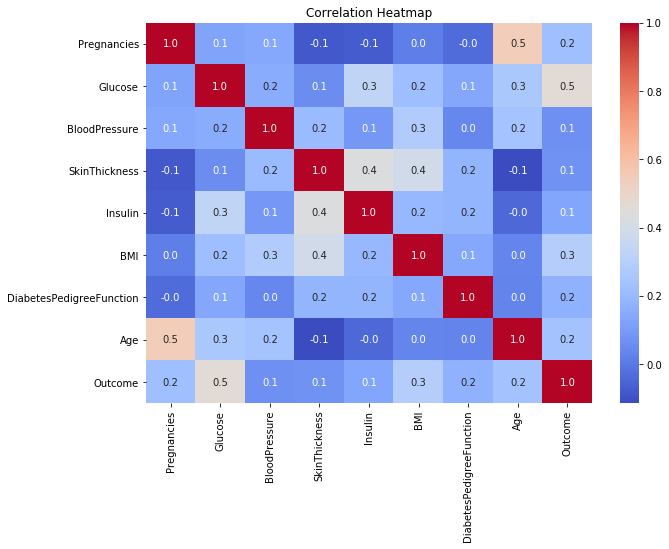

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Model

## 4.1 Split Dataset

In [0]:
# Split the dependant and independant variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting the data into Training set & Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 4.2  Apply LogisticRegression, SVM, RandomForest classification algorithms

### 4.2.1 Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(X_train,y_train)
predict1 = log.predict(X_test)
AS1=accuracy_score(y_test,predict1)
print('Accuracy Score: ',AS1)

Accuracy Score:  0.8181818181818182


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 4.2.2 SVM

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
predict2 = clf.predict(X_test)
AS2=accuracy_score(y_test,predict2)
print('Accuracy Score: ',AS2)

Accuracy Score:  0.8181818181818182


### 4.2.3 RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
predict3 = rfc.predict(X_test)
AS3=accuracy_score(y_test,predict3)
print('Accuracy Score: ',AS3)

Accuracy Score:  0.7857142857142857


## 4.3 Model Summary

In [0]:
mss = [['LogisticRegression', AS1], ['SVM', AS2], ['RandomForest', AS3]]   
ms = pd.DataFrame(mss, columns = ['Model', 'Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.818182
1,SVM,0.818182
2,RandomForest,0.785714


# 5. Apply GridSearchCV to find the best hyperparameters for your models

## 5.1 Logistic Regression

In [0]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
predict = logreg_cv.predict(X_test)
ass1=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass1)

## 5.2 SVM

In [0]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
svc_model = GridSearchCV(svc, parameters, cv=5)
svc_model.fit(X_train,y_train)
predict = svc_model.predict(X_test)
ass2=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass2)

Accuracy Score:  0.8181818181818182


## 5.3 Random Forest

In [0]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_model.fit(X_train, y_train)
predict = rfc_model.predict(X_test)
ass3=accuracy_score(y_test,predict)
print('Accuracy Score: ',ass3)

Accuracy Score:  0.7857142857142857


## 5.4 Summary

In [0]:
mss = [['LogisticRegression', ass1], ['SVM', ass2], ['RandomForest', ass3]]   
ms = pd.DataFrame(mss, columns = ['Model', 'Accuracy Score'])  
ms

,Model,Accuracy Score
0,LogisticRegression,0.824675
1,SVM,0.818182
2,RandomForest,0.785714


# 6. Model Performance (confusion matrix, precision, recall, ROC AUC)

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

## 6.1 Logistic Regression

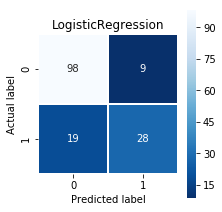

In [0]:
cm = metrics.confusion_matrix(y_test, predict1)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('LogisticRegression', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
results1 = confusion_matrix(y_test, predict1)
print('Confusion Matrix :')
print(results1)

precision1 = precision_score(y_test, predict1)
print('Precision_LogisticRegression: %f' % precision1)

recall1 = recall_score(y_test, predict1)
print('Recall_LogisticRegression: %f' % recall1)

auc1 = roc_auc_score(y_test, predict1)
print('ROC AUC_LogisticRegression: %f' % auc1)

Confusion Matrix :
[[98  9]
 [19 28]]
Precision_LogisticRegression: 0.756757
Recall_LogisticRegression: 0.595745
ROC AUC_LogisticRegression: 0.755816


## 6.2 SVM

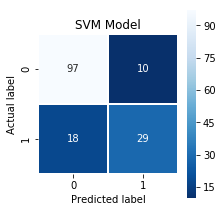

In [0]:
cm = metrics.confusion_matrix(y_test, predict2)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('SVM Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
results2 = confusion_matrix(y_test, predict2)
print('Confusion Matrix :')
print(results2)

precision2 = precision_score(y_test, predict2)
print('Precision_SVM: %f' % precision2)

recall2 = recall_score(y_test, predict2)
print('Recall_SVM: %f' % recall2)

auc2 = roc_auc_score(y_test, predict2)
print('ROC AUC_SVM: %f' % auc2)

Confusion Matrix :
[[97 10]
 [18 29]]
Precision_SVM: 0.743590
Recall_SVM: 0.617021
ROC AUC_SVM: 0.761782


## 6.3 Random Forest

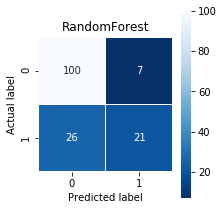

In [0]:
cm = metrics.confusion_matrix(y_test, predict3)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="g", linewidths=.5, square = True, cmap = 'Blues_r')
plt.tight_layout()
plt.title('RandomForest', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
results3 = confusion_matrix(y_test, predict3)
print('Confusion Matrix :')
print(results3) 

precision3 = precision_score(y_test, predict3)
print('Precision_RandomForest: %f' % precision3)

recall3 = recall_score(y_test, predict3)
print('Recall_Randomforest: %f' % recall3)

auc3 = roc_auc_score(y_test, predict3)
print('ROC AUC_RandomForest: %f' % auc3)

Confusion Matrix :
[[100   7]
 [ 26  21]]
Precision_RandomForest: 0.750000
Recall_Randomforest: 0.446809
ROC AUC_RandomForest: 0.690694


## 6.4 Summary

In [0]:
mmss = [['LogisticRegression', precision1,recall1,auc1], ['SVM', precision2,recall2,auc2], ['RandomForest', precision3,recall3,auc3]]   
ms = pd.DataFrame(mmss, columns = ['Model', 'Precision','Recall','AUC'])  
ms

,Model,Precision,Recall,AUC
0,LogisticRegression,0.756757,0.595745,0.755816
1,SVM,0.743590,0.617021,0.761782
2,RandomForest,0.750000,0.446809,0.690694


## **Interpretation**

**Precision**：Precision is the number of document retrieved that are relevant (tp / (tp + fp))

**Recall**：Recall is the number of relevant document that are retrieved (tp / (tp + fn))

**Two Types of Error:**

In statistical hypothesis testing a type I error is the acceptance of a false hypothesis (also known as a "***false positive***" finding or conclusion), while a type II error is the rejection of a true hypothesis (also known as a "***false negative***" finding or conclusion).

**AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve:** also called "AUROC (Area Under the Receiver Operating Characteristics)"

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at distinguishing between patients with disease and no disease

Although, SVM model has the highest recall and AUC, but Precision is a more essential index to this problem. Because for the Diabetes diagonosis problem, type I error is much severe than type II error. The larger the Precision is, the better model is. 

**Therefore, we should choose LogisticRegression model.**



# 7. Apply AutoML

In [0]:
!apt-get install default-jre
!java -version

!pip install -q h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ReneeZhang2017/Diabetes_Prediction/master/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df = h2o.H2OFrame(df)
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "Outcome"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows in train, valid and test set :  465 148 155


In [9]:
predictors = df.columns[:-1]
aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [10]:
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_20190503_021406,0.83745,0.474051,0.232885,0.392459,0.154024
StackedEnsemble_AllModels_AutoML_20190503_021406,0.835053,0.479432,0.240208,0.394385,0.15554
StackedEnsemble_BestOfFamily_AutoML_20190503_021406,0.834428,0.480057,0.237891,0.394551,0.155671
XGBoost_3_AutoML_20190503_021406,0.834297,0.480548,0.240893,0.395017,0.156038
XGBoost_2_AutoML_20190503_021406,0.833048,0.491556,0.230527,0.400162,0.160129
GLM_grid_1_AutoML_20190503_021406_model_1,0.831638,0.488798,0.238204,0.395915,0.156749
GBM_2_AutoML_20190503_021406,0.828223,0.483842,0.235171,0.397014,0.15762
GBM_3_AutoML_20190503_021406,0.827366,0.482683,0.246897,0.39631,0.157062
GBM_4_AutoML_20190503_021406,0.825483,0.48658,0.240188,0.398551,0.158843
GBM_1_AutoML_20190503_021406,0.820043,0.500529,0.242545,0.400984,0.160788


**Summary:**

From the leaderboard, we can found that XGBoost has the best performance, since it has the highest AUC score: 0.83745

**Reference**
https://github.com/h2oai/h2o-tutorials/blob/master/h2o-world-2017/automl/Python/automl_binary_classification_product_backorders.ipynb


# 8. Conclusion